In [1]:
"""
Purpose: To try the Grandiso Executor
fro quicker graph queryies using the 
GranIso Executor

"""

'\nPurpose: To try the Grandiso Executor\nfro quicker graph queryies\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty/")

# Testing out the GrandIso Executor

[{'A': 1, 'B': 2, 'C': 3}]

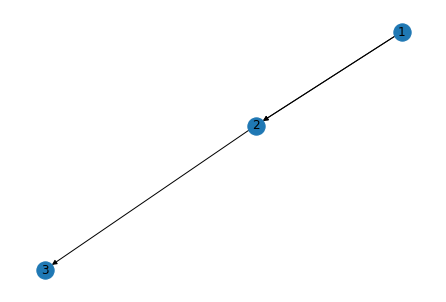

In [4]:
from dotmotif import Motif, GrandIsoExecutor, NetworkXExecutor

import networkx as nx
G = nx.MultiDiGraph()
G.add_weighted_edges_from([[1,2,11],[1,2,5],[2,3,10]])
nx.draw(G,with_labels=True)

motif = Motif('''
A -> B [weight = 11]
B -> C
''')

E = GrandIsoExecutor(graph=G,multigraph_edge_match="any")

results = E.find(motif)
results

# Loading the Platinum Graph

In [5]:
import system_utils as su
G = su.decompress_pickle("/platinum_graph/Data/G_query_v6_filtered.pbz2")

In [6]:
import networkx_utils as xu
xu.print_node_edges_counts(G)

 Graph: # of nodes = 57458, # of edges = 1904155


# Using GrandIso Executor (Faster)

In [7]:
G_inh = xu.subgraph_from_node_query(G,query="cell_type == 'inhibitory'")

In [8]:
xu.print_node_edges_counts(G_inh)

 Graph: # of nodes = 5627, # of edges = 127726


In [10]:
import dotmotif_utils as dmu
E = GrandIsoExecutor(graph=G_inh,multigraph_edge_match="any")

motif = """
A -> B 
B -> C
C -> A
"""
import time
st = time.time()

triangle_simple = dmu.graph_search(motif,
                Executor=E,
                G = G,
                verbose = True)

print(f"Total Time for GrandIsoExecutor = {time.time()- st}")

type(Excecutor) = <class 'dotmotif.executors.GrandIsoExecutor.GrandIsoExecutor'>
# of matches = 92658
total time: 304.95701360702515
Total Time for GrandIsoExecutor = 304.97657012939453


# Using Networkx Executor (Slower)

In [11]:
import dotmotif_utils as dmu
E = NetworkXExecutor(graph=G_inh,multigraph_edge_match="any")

motif = """
A -> B 
B -> C
C -> A
"""
import time
st = time.time()

dmu.graph_search(motif,
                Executor=E,
                G = G,
                verbose = True)

print(f"Total Time for GrandIsoExecutor = {time.time()- st}")

type(Excecutor) = <class 'dotmotif.executors.NetworkXExecutor.NetworkXExecutor'>
# of matches = 92658
total time: 413.2253336906433
Total Time for GrandIsoExecutor = 413.2455310821533
